# 第一题：决策树处理分类任务

1.	使用sklearn.tree.DecisionTreeClassifier完成dota2比赛结果预测问题
2.	计算最大深度为10时，十折交叉验证的精度(accuracy)，查准率(precision)，查全率(recall)，F1值
3.	绘制最大深度从1到10的决策树十折交叉验证精度的变化图

## 1. 读取数据

In [1]:
import numpy as np
dota2results = np.loadtxt('data/dota2Dataset/dota2Train.csv', delimiter=',')

In [2]:
dota2x = dota2results[:, 1:]
dota2y = dota2results[:, 0]

## 2. 导入模型

In [3]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

## 3. 训练与预测
计算最大深度为10的决策树，在使用数据dota2x，标记dota2y下，十折交叉验证的精度，查准率，查全率和F1值

In [4]:
model = DecisionTreeClassifier(max_depth = 10) # 参数max_depth决定了决策树的最大深度
# YOUR CODE HERE
prediction = cross_val_predict(model,dota2x,dota2y,cv=10)
print(accuracy_score(dota2y,prediction))
print(precision_score(dota2y,prediction))
print(recall_score(dota2y,prediction))
print(f1_score(dota2y,prediction))

0.5504695089044792
0.5556717606106489
0.7297363781722767
0.630918516549249


###### 双击此处填写下面的表格

最大深度为10：  

精度 | 查准率 | 查全率 | F1
- | - | - | -
0.5504047490555856 | 0.5556075714308006 | 0.7298798737239146 | 0.6309307579852036

## 4. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到10，决策树十折交叉验证精度的变化图

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

1
2
3
4
5
6
7
8
9
10


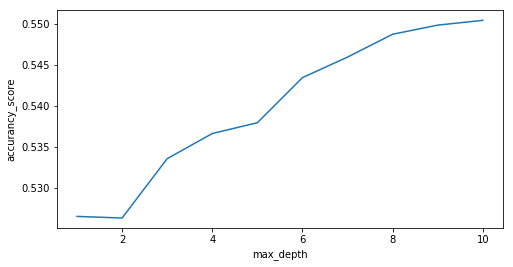

In [6]:
# YOUR CODE HERE
list_x = []
list_y = []

for i in range(1,11):
    print(i)
    model = DecisionTreeClassifier(max_depth = i) # 参数max_depth决定了决策树的最大深度
    prediction = cross_val_predict(model,dota2x,dota2y,cv=10)
    list_y.append(accuracy_score(dota2y,prediction))
    list_x.append(i)
plt.figure(figsize = (8,4))
plt.plot(list_x,list_y)
plt.xlabel("max_depth")
plt.ylabel("accurancy_score")
plt.show()

# 5. （选做）通过调整参数，得到一个泛化能力最好的模型

查看决策树文档，通过调整决策树的参数，得到一个最好的模型  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
并在下方给出参数的设定与其泛化性能指标

(92650, 116)
(92650,)
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


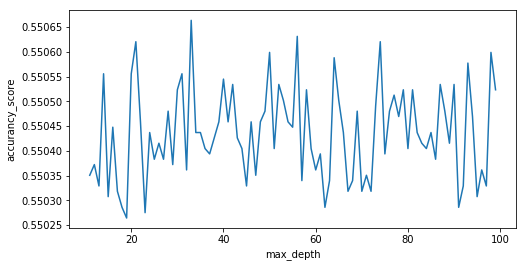

In [7]:
# YOUR CODE HERE
print(dota2x.shape)
print(dota2y.shape)
list_x = []
list_y = []

for i in range(11,100):
    print(i)
    model1 = DecisionTreeClassifier(max_depth = i,max_features='auto',min_samples_split=10,min_samples_leaf=5)
    prediction = cross_val_predict(model,dota2x,dota2y,cv=10)
    list_y.append(accuracy_score(dota2y,prediction))
    list_x.append(i)
plt.figure(figsize = (8,4))
plt.plot(list_x,list_y)
plt.xlabel("max_depth")
plt.ylabel("accurancy_score")
plt.show()

> 可修改max_features(因为其特征数量大于50)
>
> 可修改max_depth(但避免过拟合常用10~100)
>
> 可修改min_samples_split内部划分最小样本数
>
> 可修改min_samples_leaf叶子结点最小样本数
> 

In [ ]:
print(list_y)

In [33]:
max_accuracy_score = 0
best_max_Depth = 1
for i in range(0,len(list_y)):
    if(list_y[i] > max_accuracy_score):
        best_max_Depth = list_x[i]
        max_accuracy_score = list_y[i]
model = DecisionTreeClassifier(max_depth = best_max_Depth,max_features='auto',min_samples_split=10,min_samples_leaf=5)
prediction = cross_val_predict(model,dota2x,dota2y,cv=10)
print(accuracy_score(dota2y,prediction))
print(precision_score(dota2y,prediction))
print(recall_score(dota2y,prediction))
print(f1_score(dota2y,prediction))

0.5289152725310308
0.5532581193745074
0.546861547292034
0.550041237113402


###### 双击此处填写参数设置与性能指标的结果

参数设置：  


性能指标得分：

参数设置 | 精度 | 查准率 | 查全率 | F1
-| - | - | - | -
max_depth=10 | 0.5504047490555856 | 0.5556075714308006 | 0.7298798737239146 | 0.6309307579852036
max_depth=10 max_deatures=auto | 0.5504155423637345 | 0.5556040938592112 | 0.7300233692755524 | 0.6309821222913233
max_depth=12 max_deatures=auto min_samples_split=10 min_samples_leaf=5 | 0.5504587155963303 | 0.555663086913087 | 0.7297363781722767 | 0.6309129255799941